In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/ccdata/CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.drop('CUST_ID',axis=1,inplace=True)

In [5]:
df.shape

(8950, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [10]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [11]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [12]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Check for correlation using heatmap**

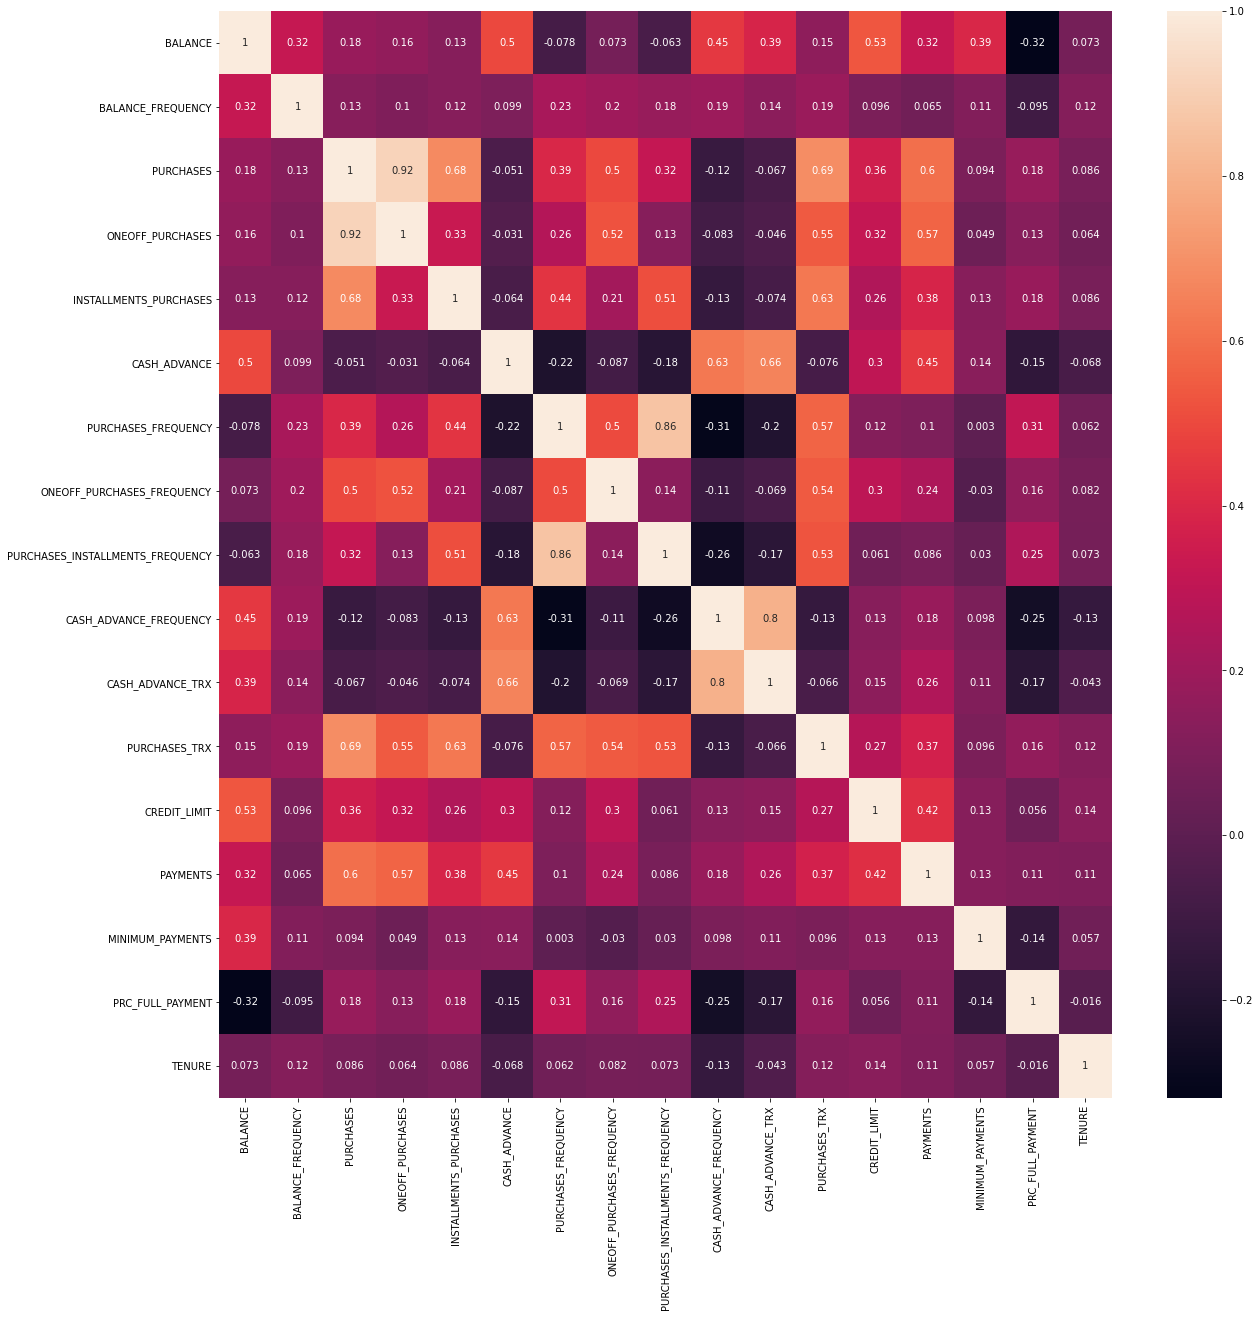

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

**Removing highly correlated features(correlation>=0.8)**

In [14]:
df.drop(['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'],axis=1,inplace=True)

**Outlier Analysis and Removal using Z-score**
* The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
* While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers

Using box plot to check for outliers

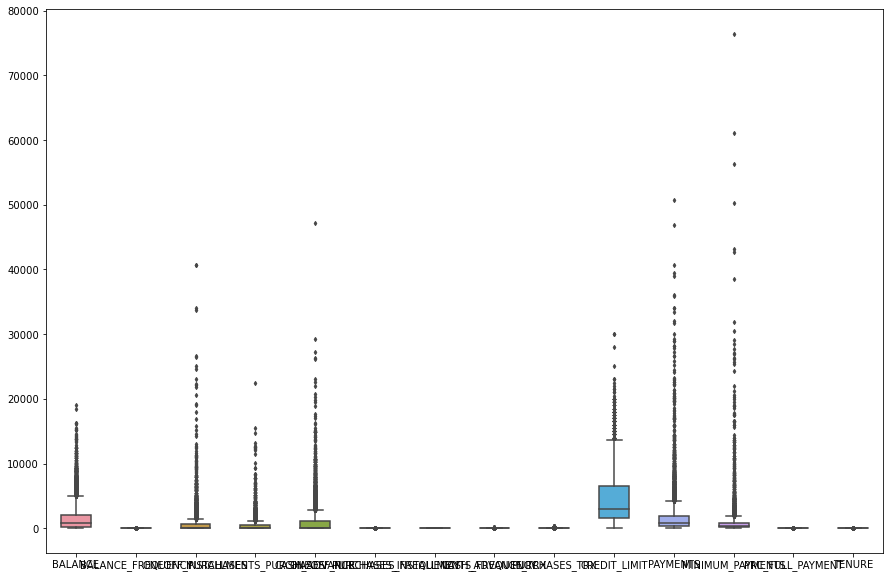

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


There are a lot of outliers

In [16]:
df.shape

(8950, 14)

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.73198937 0.24943448 0.35693402 ... 0.31096755 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.35693402 ... 0.08931021 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10888851 ... 0.10166318 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.35693402 ... 0.33546549 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.35693402 ... 0.34690648 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.30173158 ... 0.33294642 0.52555097 4.12276757]]


In [18]:
threshold = 3
print(np.where(z > 3))

(array([   6,   19,   20, ..., 8947, 8948, 8949]), array([ 2, 11, 11, ..., 13, 13, 13]))


In [19]:
df1 = df[(z < 3).all(axis=1)]

In [20]:
df1.shape

(7507, 14)

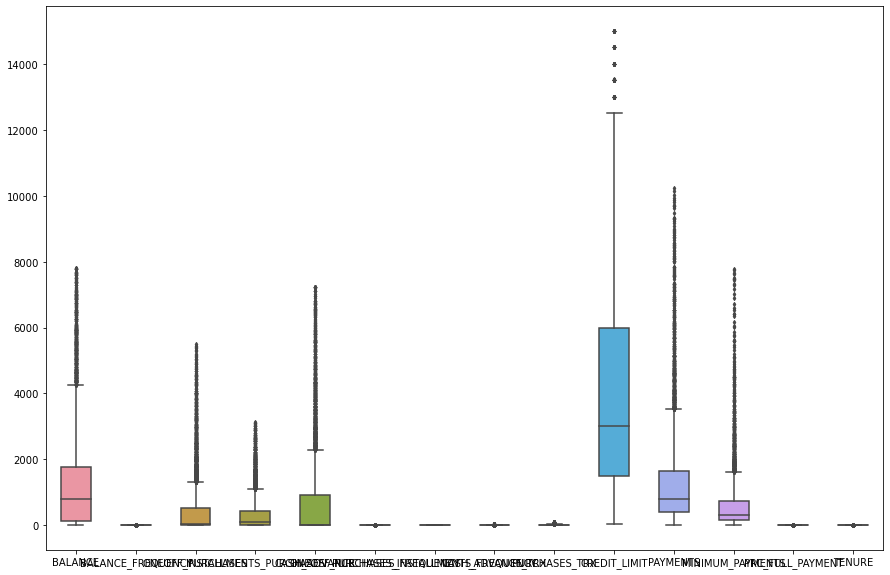

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=3)

**Checking the distribution of data**

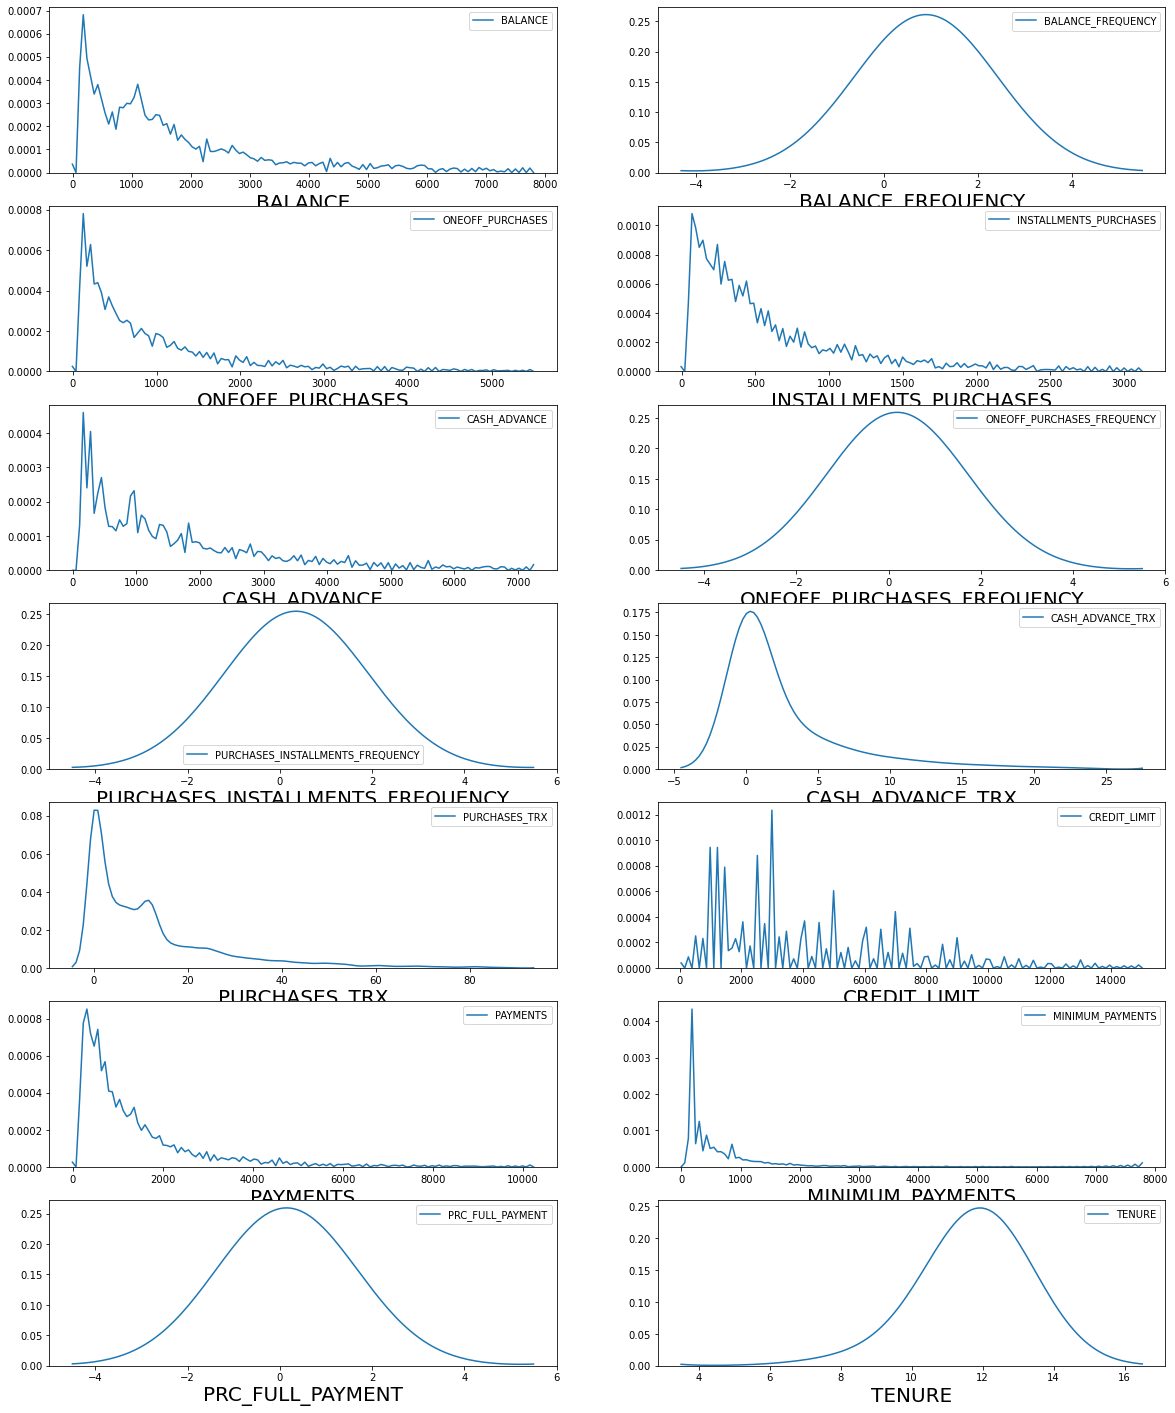

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df1[column],bw=1.5)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**There is a lot of right skeweness in some of the features**

In [23]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.4,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Using Log Transformation to handle skewness**

In [24]:
df1['log_balance']=np.log(1+df1['BALANCE'])
df1['log_oneoff_purchases']=np.log(1+df1['ONEOFF_PURCHASES'])
df1['log_installments_purchases']=np.log(1+df1['INSTALLMENTS_PURCHASES'])
df1['log_cash_advance']=np.log(1+df1['CASH_ADVANCE'])
df1['log_cash_advance_trx']=np.log(1+df1['CASH_ADVANCE_TRX'])
df1['log_purchases_trx']=np.log(1+df1['PURCHASES_TRX'])
df1['log_credit_limit']=np.log(1+df1['CREDIT_LIMIT'])
df1['log_payments']=np.log(1+df1['PAYMENTS'])
df1['log_minimum_payments']=np.log(1+df1['MINIMUM_PAYMENTS'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [25]:
df1.drop(['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df1.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PRC_FULL_PAYMENT,TENURE,log_balance,log_oneoff_purchases,log_installments_purchases,log_cash_advance,log_cash_advance_trx,log_purchases_trx,log_credit_limit,log_payments,log_minimum_payments
0,0.818182,0.000000,0.083333,0.000000,12,3.735304,0.000000,4.568506,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277
1,0.909091,0.000000,0.000000,0.222222,12,8.071989,0.000000,0.000000,8.770896,1.609438,0.000000,8.853808,8.319725,6.978531
2,1.000000,1.000000,0.000000,0.000000,12,7.822504,6.651791,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994
3,0.636364,0.083333,0.000000,0.000000,12,7.419183,7.313220,0.000000,5.331694,0.693147,0.693147,8.922792,0.000000,6.762968
4,1.000000,0.083333,0.000000,0.000000,12,6.707735,2.833213,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483


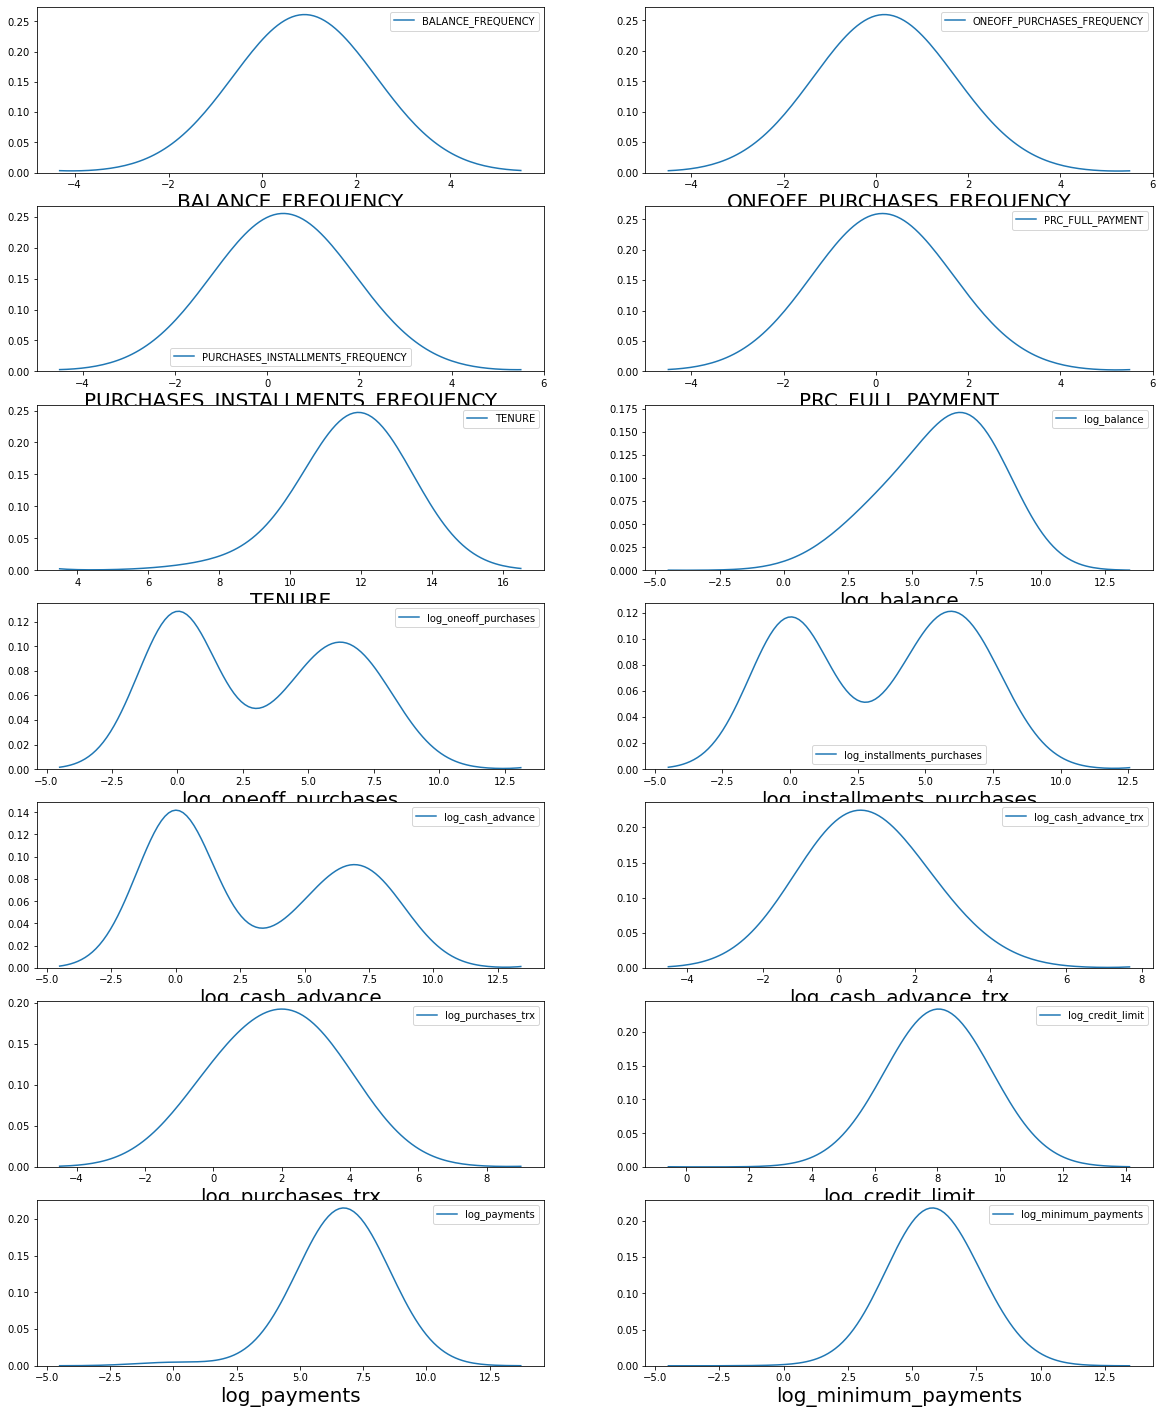

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df1[column],bw=1.5)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df1)
X.shape

(7507, 14)

# K-Means Clustering
* Elbow curve to determine the K value

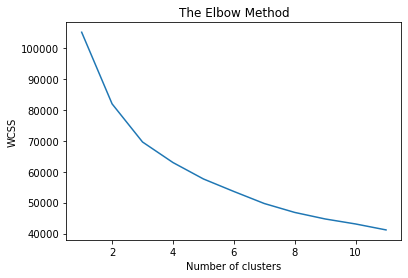

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Taking K value as 5**

In [30]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 0 1 ... 0 3 0]


In [31]:
labels = kmeans.labels_
labels

array([2, 0, 1, ..., 0, 3, 0], dtype=int32)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(2)
principalComponents = pca.fit_transform(X)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}

(7507, 2)


In [33]:
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby(labels)

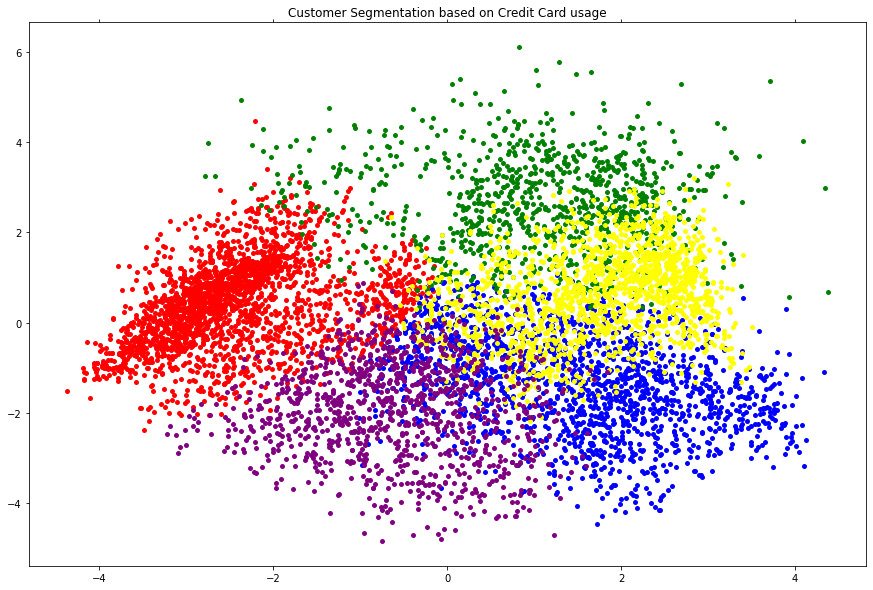

In [34]:
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Customer Segmentation based on Credit Card usage")
plt.show()